### Node.js
- need to install NodeJS on computer
- for asynchronous programming
- allows for sending and recieving data to and from multiple devices at once
    - no complicated thread management and synch
- JavaScript lends itself well to a system like Node
- Node is a JavaScript interpreter

### Node
- similar to browser but no console.log()
    - instead of

~~~ JavaScript
let message = "Hello world!";
console.log(message);
~~~
use
~~~ node.js
$ node hello.js
Hello world!
~~~

- process.[something] functions
    - process.exit(n) provieds an exit status code of n
    - process.argv() prints out any arguments to the script in an array
- All the standard JavaScript global bindings, such as Array, Math, and JSON, are also present in Node’s environment.
- Browser-related functionality, such as document (DOM) or prompt, is not

### CommonJS Module System
- loads built-in modules, download packages, files in your program
    - like library importing or including in Python & C++
### Modules
- specify which other pieces it relies on and what functionality it provides
    - like libraries
- have dependencies
    - loading a module automatically loads dependencies of that module
- scope
    - each one should have its own private scope to prevent conflicts
### Packages
- chunks of code that can be distributed
- basically a library of modules
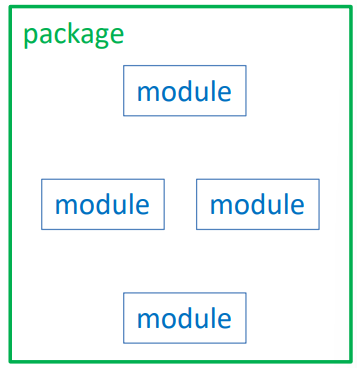

### Node Package Manager (NPM)
- anyone can post to so some is great and some is big bad
- online service where you can down/upload packages
- program to install and manage packages
- `npm publish` will publish a package to the registry
### Installation
- ini file contains the library
- load library and parse the config file
![image.png](attachment:image.png)
- by default, NPM installs stuff in the current directory, not a centralized location
    - puts each application in direct control over packages
    - improves version control and portability 
- you should (but don't have to) create a package.json file for each package 
    - can be done through `npm init`
    - contains human readable metadata about the project
    - contains a list of other package dependencies for the package
        - NPM will install these dependencies
        - if not listed, NPM will add used packages to package.json
    - contains version number
        
~~~ json
{
    "name": "eloquent-javascript-robot",
    "version": "1.0.0",
    "dependencies": {
        "dijkstrajs": "^1.0.1",
        "random-item": "^1.0.0"
    },
}
~~~

### Version Numbering
- first digit is major version
    - increment when compatability is broken
- second is minor version
    - increment when functions are added
- third is patch (bug fix) version

- caret `^` in front of version number indicates compatibility with anything in the major version number above the listed number
    - e.g. `^2.3.0` indicates compatibility with:
        - greater than or equal (>=) to 2.3.0
        - and less than (<) 3.0.0
        - Or 2.3.0 and any patches (i.e., bug fixes to it)

### CommonJS Module System (Continued)
- when `require` is called
    - node resolves the string argument to a file to load
        - can be local or built in file in node_modules directory
- pathnames start with `/`, `./`, or `../`
    - `/` is root directory
    - `./` is in current 
    - `../` is one up from current

~~~ node.js
interface = require("/tmp/robot");
~~~
![image.png](attachment:image.png)

- if the string doesn't look like a relative or absolute path
    - assumes it is a built in module
    - looks in node_modules
    - `require("robot")` might try to load the library found in node_modules/robot/

~~~ node.js
const {reverse} = require("./reverse");
~~~
- the curly brackets allows you to use the function directly without making it global
- I think it's like the RadioScatterEvent::histogram... syntax specifying where stuff comes from

- Option 1:
~~~ node.js
let fs = require('fs');
fs.readFile() … // have to specify fs.___ for every use
~~~
- Option 2:
~~~ node.js 
let {readFile} = require("fs");
readFile() … // can just use the function without the fs. part
~~~

### File IO & Text Files
- file system module (fs)
    - one of the most common modues
- readFile
    - should pass the encoding
        - else it assumes binary format & return a buffer instead of a string
        - array like object representing the bytes in the files
- writeFile
    - used to write a file to disk
    - not required to specify encoding, defaults to UTF-8
    - assumes it has been given a string

~~~ node.js
> const {writeFile} = require("fs");
> writeFile("graffiti.txt", "Node was here", err => {
... if (err) console.log(`Failed to write file: ${err}`);
... else console.log("File written.");
... });
> File written.
~~~
creates file graffiti.txt with “Node was here”
---
~~~ node.js
> let {readFile} = require("fs");
> readFile("graffiti.txt", "utf8", (error, text) => {
... if (error) throw error;
... console.log("The file contains:", text);
... });
> The file contains: Node was here
~~~
reads graffiti.txt as text and prints out “Node was here”
---
~~~ node.js
> readFile("graffiti.txt", (error, buffer) => {
... if (error) throw error;
... console.log("The file contained", buffer.length, "bytes.",
..... "The first byte is:", buffer[0]);
... });
> The file contained 13 bytes. The first byte is: 78
~~~
reads graffiti.txt as binary and prints out hex value of first byte, the character “N”

### other fs functions
- most fs functions take a callback function as the last parameter
    - from fs version 10.1, fs allows using promises instead of callback.
    - requires specifying via

~~~ node
const {readFile} = require("fs").promises;
readFile("file.txt", "utf8")
.then(text => console.log("The file contains:", text));
~~~
- synchronous fs
    - just add "sync" to the function name
    - program is stopped entirely when a synchronous operation is being performed

### HTTP Module
- provides functionality for making HTTP servers and taking requests
- way easy to make a server
~~~node
const {createServer} = require("http");
let server = createServer((request, response) => {
response.writeHead(200, {"Content-Type": "text/html"});
response.write(`
<h1>Hello!</h1>
<p>You asked for <code>${request.url}</code></p>`);
response.end();
});
server.listen(8000);
console.log("Listening! (port 8000)");
~~~
    ^^^ That's a server. Good Job.
- after running this, you can point your web browser at http://localhost:8000/hello to make a request to your server. 
    - you are the client when you access this page

- the function `(=>)`, passed as an argument to `createServer`, is called every time a client connects to the server

``` HTML
HTTP/1.1 200 OK
Content-Type: text/html
<!doctype html>
<h1>Hello!</h1>
<p>You asked for
<code>${request.url}</code></p>
```
    ^^^ server response
- a real server does more than just this
    - looks at `requrest.method` to see what action the client wants to perform
    - looks at `request.url` to find out which resource the action is being performed on

### HTTP Client Request
- server to server (browserless) communication
- uses `request` function of http module
~~~ node.js
const {request} = require("http");
let requestStream = request({
    hostname: "eloquentjavascript.net",
    path: "/20_node.html",
    method: "GET",
    headers: {Accept: "text/html"}
}, response => {
    console.log("Server responded with status code",
    response.statusCode);
});
requestStream.end();
~~~
- telling Node:
    - what server to talk to (eloquentjavascript.net)
    - what path to request from that server (/20_node.html)
    - which method to use (GET)
    - and so on (headers: {Accept: "text/html"})
Response:
~~~ HTML
GET /20_node.html HTTP/1.1
Host: eloquentjavascript.net
Accept: text/html
~~~
- uses `requestStream` to stream data into the request with the `write` method
    - finish request with `requestStream.end`
